# 1. Data Preprocessing and Basic EDA

This is the earliest stage of the project, where I will mostly deal with cleaning data: analyze irregularities, analyze streucture of the data, anomalies, and make decisions aligned with the project's goal.

The structure of this notebook is organized as follows:

<ul>
    <li>1. Imports</li>
    <li>2. Data</li>
        <ul>
            <li>2.1 Business Dataset</li>
            <li>2.2 Review Dataset</li>
            <li>2.3 User Dataset</li>
        </ul>
    <li>3. Early EDA and Data Cleaning </li>
        <ul>
            <li>3.1 Missing values</li>
            <li>3.2 Duplicate rows</li>
            <li>3.3 Removing unnecessary features</li>
        </ul>
    <li>4. Saving data for the next stage</li>
</ul>

# 1. Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [2]:
#loading the csv files into pandas dataframe
business = pd.read_csv('data/yelp_training_set_business.csv')
review = pd.read_csv('data/yelp_training_set_review.csv')
user = pd.read_csv('data/yelp_training_set_user.csv')

## 2.1 Businesses Dataset

**Analysis**

- dtypes: bool(1), float64(4), int64(2), object(8)
- column_a is another index column
- business_categories have missing values
- business_neighborhoods contain no information

**Feature Description**

    business_blank - bool, unidentifiable
    business_categories - an array of strings of business categories
    business_city - string, the city
    business_full_address - string, the full address of the business
    business_id - string, 22 character unique string business id
    business_latitude - float, latitude
    business_longitude - float, longitude
    business_name - string, the business's name
    business_neighborhoods - NaN's
    business_open - bool, True if open, False if closed
    business_review_count - integer, number of reviews
    business_stars - float, star rating, rounded to half-stars
    business_state - string, 2 character state code, if applicable
    business_type - string, business type
    business_location - string, longitude and latitude of the business location

In [3]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   column_a                11537 non-null  int64  
 1   business_categories     11360 non-null  object 
 2   business_city           11537 non-null  object 
 3   business_full_address   11537 non-null  object 
 4   business_id             11537 non-null  object 
 5   business_latitude       11537 non-null  float64
 6   business_longitude      11537 non-null  float64
 7   business_name           11537 non-null  object 
 8   business_neighborhoods  0 non-null      float64
 9   business_open           11537 non-null  bool   
 10  business_review_count   11537 non-null  int64  
 11  business_stars          11537 non-null  float64
 12  business_state          11537 non-null  object 
 13  business_type           11537 non-null  object 
 14  business_location       11537 non-null

In [4]:
business.head()

,column_a,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,business_open,business_review_count,business_stars,business_state,business_type,business_location
0,0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,NaN,True,3,5.0,AZ,business,POINT(-112.241596 33.581867)
1,1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,NaN,True,5,5.0,AZ,business,POINT(-112.105933 33.604054)
2,2,NaN,Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",3f_lyB6vFK48ukH6ScvLHg,33.460526,-112.073933,Valley Permaculture Alliance,NaN,True,4,5.0,AZ,business,POINT(-112.0739333 33.4605258)
3,3,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,NaN,True,5,3.5,AZ,business,POINT(-112.0853773 33.3922099)
4,4,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,NaN,True,14,3.5,AZ,business,POINT(-112.200264 33.712797)


In [5]:
business.columns

Index(['column_a', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'business_location'],
      dtype='object')

In [6]:
business['business_categories'].value_counts()

Mexican; Restaurants                                                            528
Pizza; Restaurants                                                              281
Hotels & Travel; Event Planning & Services; Hotels                              227
Food; Coffee & Tea                                                              225
Restaurants                                                                     202
                                                                               ... 
Bars; Food; Beer, Wine & Spirits; Wine Bars; Nightlife; Restaurants               1
Computers; Shopping; Home & Garden; Appliances                                    1
Bars; Music Venues; Arts & Entertainment; Dive Bars; Nightlife; Comedy Clubs      1
Bridal; Fashion; Shopping                                                         1
Cosmetology Schools; Specialty Schools; Education; Beauty & Spas                  1
Name: business_categories, Length: 2060, dtype: int64

In [7]:
business['business_city'].value_counts()

Phoenix             4154
Scottsdale          2026
Tempe               1153
Mesa                 898
Chandler             865
Glendale             610
Gilbert              439
Peoria               267
Surprise             161
Avondale             129
Goodyear             125
Queen Creek           78
Cave Creek            65
Paradise Valley       57
Casa Grande           48
Fountain Hills        47
Apache Junction       46
Anthem                34
Buckeye               31
Maricopa              31
Sun City              28
Wickenburg            28
Litchfield Park       26
Laveen                22
Tolleson              22
Carefree              20
Gold Canyon           13
El Mirage             11
Gila Bend             10
Florence              10
Sun City West          8
Fort McDowell          7
Youngtown              7
San Tan Valley         6
Higley                 6
Morristown             5
Coolidge               5
Guadalupe              4
Sun Lakes              4
Ahwatukee              4


In [8]:
business['business_neighborhoods'].value_counts()

Series([], Name: business_neighborhoods, dtype: int64)

In [9]:
business['business_open'].value_counts()

True     10313
False     1224
Name: business_open, dtype: int64

In [10]:
business['business_open'].value_counts()

True     10313
False     1224
Name: business_open, dtype: int64

In [11]:
business['business_review_count'].value_counts()

3      2531
4      1709
5      1032
6       835
7       576
       ... 
200       1
245       1
549       1
268       1
239       1
Name: business_review_count, Length: 293, dtype: int64

In [12]:
business['business_stars'].value_counts()

4.0    2674
3.5    2639
4.5    1748
3.0    1511
5.0    1273
2.5    1011
2.0     403
1.5     170
1.0     108
Name: business_stars, dtype: int64

In [13]:
business['business_state'].value_counts()

AZ    11534
CA        1
SC        1
CO        1
Name: business_state, dtype: int64

In [14]:
business['business_type'].value_counts()

business    11537
Name: business_type, dtype: int64

In [15]:
type(business['business_location'][0])

str

## 2.2 Reviews Dataset

**Analysis**

- 33 features
- dtypes: bool(3), float64(5), int64(10), object(15)
- column_a is another index column
- review dataframe contains all features from the business dataframe
- reviewer_name have missing values
- text contains missing values

**Feature Description**

    business_blank - bool, unidentifiable
    business_categories - an array of strings of business categories
    business_city - string, the city
    business_full_address - string, the full address of the business
    business_id - string, 22 character unique string business id
    business_latitude - float, latitude
    business_longitude - float, longitude
    business_name - string, the business's name
    business_neighborhoods - NaN's
    business_open - bool, True if open, False if closed
    business_review_count - integer, number of reviews
    business_stars - float, star rating, rounded to half-stars
    business_state - string, 2 character state code, if applicable
    business_type - string, business type
    cool - integer, number of cool votes received
    date - string, date formatted YYYY-MM-DD
    funny - integer, number of funny votes received
    review_id - string, 22 character unique review id
    reviewer_average_stars - float, average rating of all reviews
    reviewer_blank - bool, undefined
    reviewer_cool - integer, number of cool votes sent by the user
    reviewer_funny - integer, number of funny votes sent by the user
    reviewer_name - string, the user's first name
    reviewer_review_count - integer, the number of reviews they've written
    reviewer_type - string, user
    reviewer_useful - integer, number of useful votes sent by the user
    stars - integer, star rating
    text - string, the review itself
    type - string, type of text review
    useful - integer, number of useful votes received
    user_id - string, 22 character unique user id, maps to the user in user
    business_location - string, longitude and latitude of the business location

In [16]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   column_a                229907 non-null  int64  
 1   business_blank          229907 non-null  bool   
 2   business_categories     229130 non-null  object 
 3   business_city           229907 non-null  object 
 4   business_full_address   229907 non-null  object 
 5   business_id             229907 non-null  object 
 6   business_latitude       229907 non-null  float64
 7   business_longitude      229907 non-null  float64
 8   business_name           229907 non-null  object 
 9   business_neighborhoods  0 non-null       float64
 10  business_open           229907 non-null  bool   
 11  business_review_count   229907 non-null  int64  
 12  business_stars          229907 non-null  float64
 13  business_state          229907 non-null  object 
 14  business_type       

In [17]:
review.head()

,column_a,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id,business_location
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q,POINT(-112.012504 33.390792)
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ,POINT(-111.9787576 33.3056067)
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg,POINT(-111.913031 33.414345)
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg,POINT(-111.907886266708 33.5229446452242)
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw,POINT(-111.6844821 33.3910269)


In [18]:
review.columns

Index(['column_a', 'business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id', 'business_location'],
      dtype='object')

In [19]:
review['reviewer_average_stars'].value_counts()

0.00    14029
4.00     9454
5.00     8060
3.00     4045
3.67     4027
        ...  
1.61        1
2.07        1
1.36        1
1.09        1
1.82        1
Name: reviewer_average_stars, Length: 331, dtype: int64

In [20]:
review['reviewer_cool'].value_counts()

0       39450
1       15012
2       10795
3        8321
4        6584
        ...  
3703        1
3902        1
710         1
2479        1
662         1
Name: reviewer_cool, Length: 1116, dtype: int64

In [21]:
review['reviewer_type'].value_counts()

user    229907
Name: reviewer_type, dtype: int64

In [22]:
review['stars'].value_counts()

4    79878
5    76193
3    35363
2    20957
1    17516
Name: stars, dtype: int64

In [23]:
review['type'].value_counts()

review    229907
Name: type, dtype: int64

In [24]:
review['text'][11]

'Wonderful Vietnamese sandwich shoppe. Their baguettes are great hot out of the oven with butter or in one of their many sandwich choices. They have a modest selection of baked goods along with some of the best egg rolls around. Bring cash or your ATM card as no credit cards are accepted but they have an ATM on premises.'

In [25]:
review['reviewer_blank'].value_counts()

False    215879
True      14028
Name: reviewer_blank, dtype: int64

## 2.3 Users Dataset

**Analysis**
- 9 features
- dtypes: float64(1), int64(5), object(3)
- column_a has no information

**Feature Description**

    reviewer_average_stars - float, average rating of all reviews
    reviewer_cool - integer, number of cool votes sent by the user
    reviewer_funny - integer, number of funny votes sent by the user
    reviewer_name - string, the user's first name
    reviewer_review_count - integer, the number of reviews they've written
    reviewer_type - string, user
    reviewer_useful - integer, number of useful votes sent by the user
    user_id - string, 22 character unique user id, maps to the user in user

In [26]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43873 entries, 0 to 43872
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   column_a                43873 non-null  int64  
 1   reviewer_average_stars  43873 non-null  float64
 2   reviewer_cool           43873 non-null  int64  
 3   reviewer_funny          43873 non-null  int64  
 4   reviewer_name           43873 non-null  object 
 5   reviewer_review_count   43873 non-null  int64  
 6   reviewer_type           43873 non-null  object 
 7   reviewer_useful         43873 non-null  int64  
 8   user_id                 43873 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 3.0+ MB


In [27]:
user.head()

,column_a,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,user_id
0,0,5.0,0,0,Jim,6,user,7,CR2y7yEm4X035ZMzrTtN9Q
1,1,1.0,0,0,Kelle,2,user,1,_9GXoHhdxc30ujPaQwh6Ew
2,2,5.0,0,0,Stephanie,2,user,1,8mM-nqxjg6pT04kwcjMbsw
3,3,5.0,0,0,T,2,user,2,Ch6CdTR2IVaVANr-RglMOg
4,4,1.0,0,0,Beth,1,user,0,NZrLmHRyiHmyT1JrfzkCOA


In [28]:
user['reviewer_type'].value_counts()

user    43873
Name: reviewer_type, dtype: int64

# Early EDA and Data Cleaning 

**Analysis**
- The review dataset contains all features from the business and the user dataset. At this moment it is unclear if the user and business dataset will be used for further data analysis.

**Recommendations**

I recommend removing the following features from the datasets if applicable:

    column_a - contains the index
    business_blank - contains only the False boolean value of unknown       
    business_neighborhoods - contains all missing values
    business_type - contains only one value 'business'
    reviewer_type - has only one value 'user' which is deemed unnecessary
    type - contains only one value 'review' which is deemed unnecess      
    business_location - contains already existing information on longitude/latitude)

## 3.1 Missing values

### Business Dataset

- All missing values have been removed on the *business_categories* column

In [29]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', business.isnull().values.sum())
print('Percent of missing values per feature: ') 
business.isnull().sum() * 100 / len(business)

Number of missing values:  11714
Percent of missing values per feature: 


column_a                    0.000000
business_categories         1.534194
business_city               0.000000
business_full_address       0.000000
business_id                 0.000000
business_latitude           0.000000
business_longitude          0.000000
business_name               0.000000
business_neighborhoods    100.000000
business_open               0.000000
business_review_count       0.000000
business_stars              0.000000
business_state              0.000000
business_type               0.000000
business_location           0.000000
dtype: float64

<AxesSubplot:>

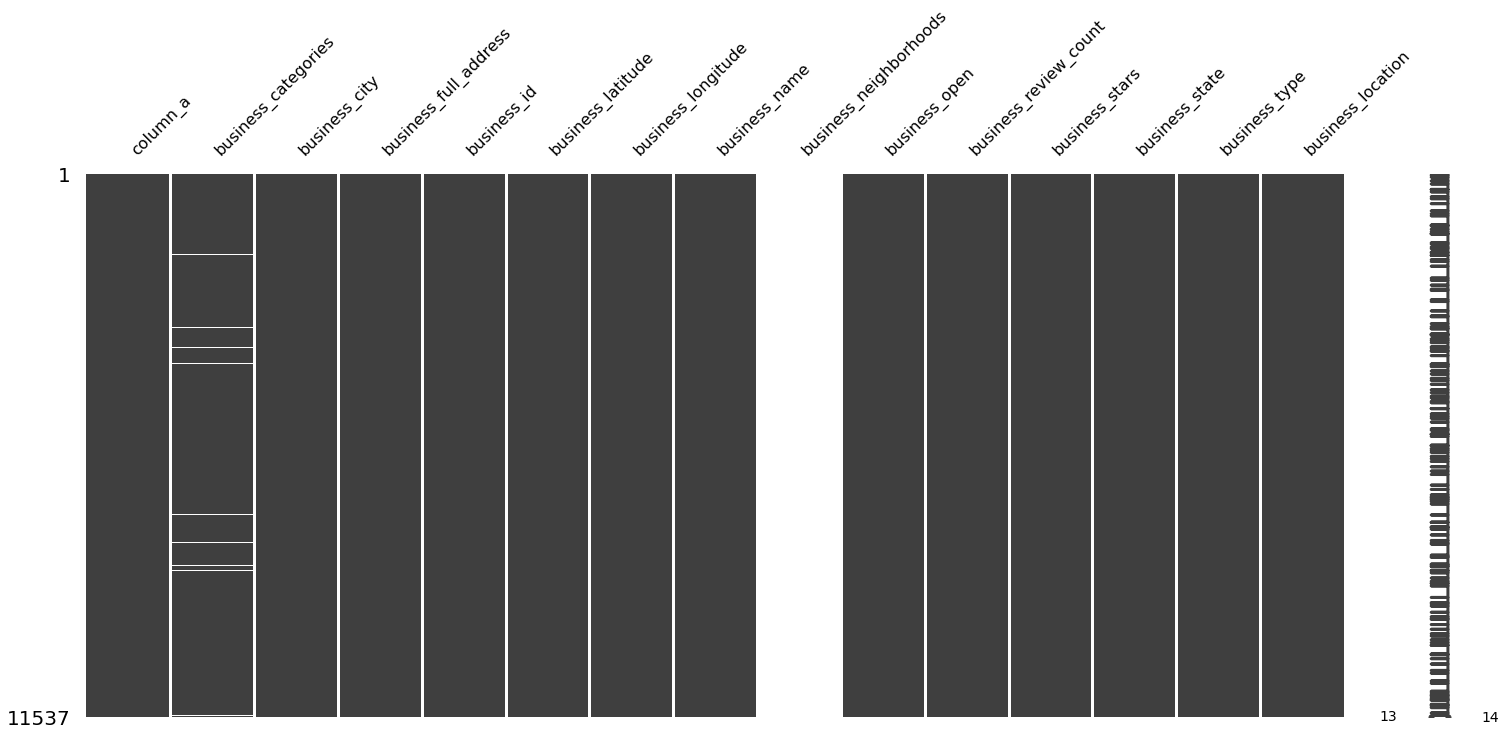

In [30]:
#matrix map of missing values
msno.matrix(business)

In [31]:
#removing all missing values in categories
business.dropna(subset = ['business_categories'], inplace=True)

In [32]:
#resetting the index
business.reset_index(drop=True, inplace=True)
business.head()

,column_a,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,business_open,business_review_count,business_stars,business_state,business_type,business_location
0,0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,NaN,True,3,5.0,AZ,business,POINT(-112.241596 33.581867)
1,1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,NaN,True,5,5.0,AZ,business,POINT(-112.105933 33.604054)
2,3,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,NaN,True,5,3.5,AZ,business,POINT(-112.0853773 33.3922099)
3,4,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,NaN,True,14,3.5,AZ,business,POINT(-112.200264 33.712797)
4,5,Women's Clothing; Fashion; Shopping,Glendale,The Americana at Brand\n869 Americana Way\nGle...,gtQzAiy7D-dPU8WzT3jX3Q,33.607766,-112.481632,Barney's New York Co-op,NaN,True,6,4.5,CA,business,POINT(-112.481632232666 33.6077660588006)


### Review Dataset

- All missing values have been removed on the *business_categories* column
- There are missing values left in the *reviewers_name*, I decided not to remove them at this early stage of Data Exploration

In [33]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', review.isnull().values.sum())
print('Percent of missing values per feature: ') 
review.isnull().sum() * 100 / len(review)

Number of missing values:  244718
Percent of missing values per feature: 


column_a                    0.000000
business_blank              0.000000
business_categories         0.337963
business_city               0.000000
business_full_address       0.000000
business_id                 0.000000
business_latitude           0.000000
business_longitude          0.000000
business_name               0.000000
business_neighborhoods    100.000000
business_open               0.000000
business_review_count       0.000000
business_stars              0.000000
business_state              0.000000
business_type               0.000000
cool                        0.000000
date                        0.000000
funny                       0.000000
review_id                   0.000000
reviewer_average_stars      0.000000
reviewer_blank              0.000000
reviewer_cool               0.000000
reviewer_funny              0.000000
reviewer_name               6.101598
reviewer_review_count       0.000000
reviewer_type               0.000000
reviewer_useful             0.000000
s

<AxesSubplot:>

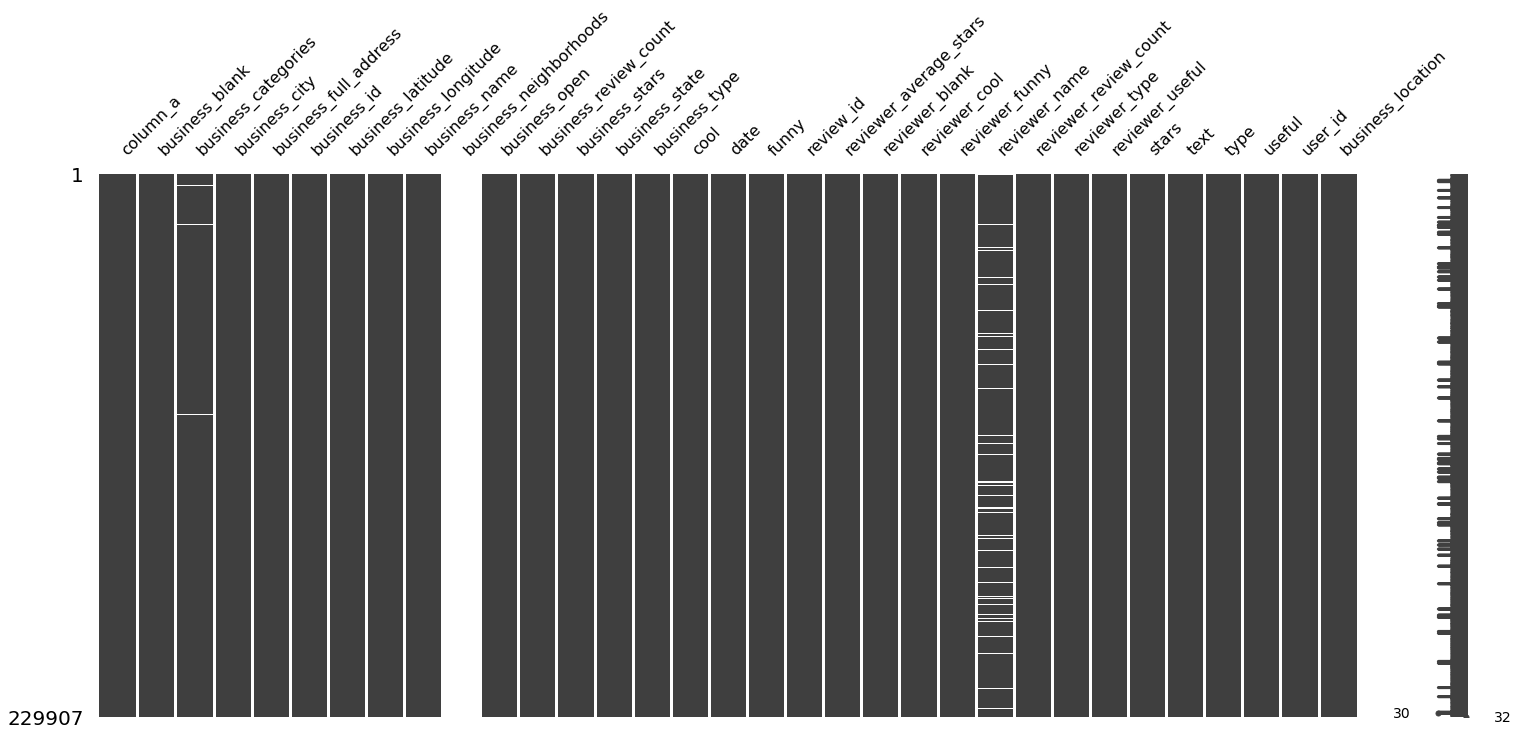

In [34]:
#matrix map of missing values
msno.matrix(review)

In [35]:
#removing all missing values in categories
review.dropna(subset = ['business_categories'], inplace=True)

In [36]:
#resetting the index
review.reset_index(drop=True, inplace=True)
review.head()

,column_a,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id,business_location
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q,POINT(-112.012504 33.390792)
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ,POINT(-111.9787576 33.3056067)
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg,POINT(-111.913031 33.414345)
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg,POINT(-111.907886266708 33.5229446452242)
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw,POINT(-111.6844821 33.3910269)


### User Dataset

In [37]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', user.isnull().values.sum())
print('Percent of missing values per feature: ') 
user.isnull().sum() * 100 / len(user)

Number of missing values:  0
Percent of missing values per feature: 


column_a                  0.0
reviewer_average_stars    0.0
reviewer_cool             0.0
reviewer_funny            0.0
reviewer_name             0.0
reviewer_review_count     0.0
reviewer_type             0.0
reviewer_useful           0.0
user_id                   0.0
dtype: float64

## 3.2 Duplicate rows

- There were no duplicate rows detected in the dataset

In [38]:
#checking for duplicate rows
len(business) - len(business.drop_duplicates())

0

In [39]:
#checking for duplicate rows
len(review) - len(review.drop_duplicates())

0

In [40]:
#checking for duplicate rows
len(user) - len(user.drop_duplicates())

0

## 3.3 Removing unnecessary features

### Business Dataset

In [41]:
#dropping unnecessary columns in the business dataset

business.drop(columns=['column_a', 
                       'business_neighborhoods', 
                       'business_location', 
                       'business_type'], 
              inplace=True)

In [42]:
#resetting the index
business.reset_index(drop=True, inplace=True)
business.head()

,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,business_state
0,Accountants; Professional Services; Tax Servic...,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",rncjoVoEFUJGCUoC1JgnUA,33.581867,-112.241596,Peoria Income Tax Service,True,3,5.0,AZ
1,Sporting Goods; Bikes; Shopping,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",0FNFSzCFP_rGUoJx8W7tJg,33.604054,-112.105933,Bike Doctor,True,5,5.0,AZ
2,Food; Grocery,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",usAsSV36QmUej8--yvN-dg,33.392210,-112.085377,Food City,True,5,3.5,AZ
3,Food; Bagels; Delis; Restaurants,Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",PzOqRohWw7F7YEPBz6AubA,33.712797,-112.200264,Hot Bagels & Deli,True,14,3.5,AZ
4,Women's Clothing; Fashion; Shopping,Glendale,The Americana at Brand\n869 Americana Way\nGle...,gtQzAiy7D-dPU8WzT3jX3Q,33.607766,-112.481632,Barney's New York Co-op,True,6,4.5,CA


In [43]:
print('Number of missing values: ', business.isnull().values.sum())
print('Data lenght: ', len(business))

Number of missing values:  0
Data lenght:  11360


### Review Dataset

In [44]:
#dropping unnecessary columns in the review dataset

review.drop(columns=['column_a', 
                     'business_blank', 
                     'business_neighborhoods',
                     'business_type',
                     'reviewer_type', 
                     'type', 
                     'business_location'], 
            inplace=True)

In [45]:
#resetting the index in the review dataset
review.reset_index(drop=True, inplace=True)
review.head()

,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_open,business_review_count,business_stars,...,reviewer_blank,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,stars,text,useful,user_id
0,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,True,116,4.0,...,False,322,331,Jason,376,1034,5,My wife took me here on my birthday for breakf...,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,True,102,4.0,...,False,0,2,Paul,2,0,5,I have no idea why some people give bad review...,0,0a2KyEL0d3Yb1V6aivbIuQ
2,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,True,265,4.5,...,False,0,0,Nicole,3,3,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
3,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,True,88,4.5,...,False,36,18,lindsey,31,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,uZetl9T0NcROGOyFfughhg
4,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,True,5,4.5,...,False,8,3,Roger,28,32,5,General Manager Scott Petello is a good egg!!!...,0,vYmM4KTsC8ZfQBg-j5MWkw


In [46]:
print('Number of missing values: ', review.isnull().values.sum())
print('Data lenght: ', len(review))

Number of missing values:  13966
Data lenght:  229130


### User Dataset

In [47]:
#dropping unnecessary columns in the user dataset
user.drop(columns=['column_a', 'reviewer_type'], inplace=True)

In [48]:
#resetting the index in the user dataset
user.reset_index(drop=True, inplace=True)
user.head()

,reviewer_average_stars,reviewer_cool,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_useful,user_id
0,5.0,0,0,Jim,6,7,CR2y7yEm4X035ZMzrTtN9Q
1,1.0,0,0,Kelle,2,1,_9GXoHhdxc30ujPaQwh6Ew
2,5.0,0,0,Stephanie,2,1,8mM-nqxjg6pT04kwcjMbsw
3,5.0,0,0,T,2,2,Ch6CdTR2IVaVANr-RglMOg
4,1.0,0,0,Beth,1,0,NZrLmHRyiHmyT1JrfzkCOA


In [49]:
print('Number of missing values: ', user.isnull().values.sum())
print('Data lenght: ', len(user))

Number of missing values:  0
Data lenght:  43873


# 4. Saving data for the next stage

In [56]:
# business dataset
business.to_csv('data/business_prepared.csv')

#review dataset
review.to_csv('data/review_prepared.csv')

#user dataset
user.to_csv('data/user_prepared.csv')